In [87]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2022-12-20 19:35:47,356: Credentials are already in use. The existing account in the session will be replaced.


In [88]:
H =    [[0.00125831, 0.01001185, 0.00127092, 0.01446157, 0.00813463,
        0.00122314, 0.00139337, 0.0011896 ],
       [0.01001185, 0.00253061, 0.0011896 , 0.00813463, 0.01446157,
        0.00139337, 0.00122314, 0.00127092],
       [0.00127092, 0.0011896 , 0.01403444, 0.00139337, 0.00099804,
        0.00813463, 0.01446157, 0.00351768],
       [0.01446157, 0.00813463, 0.00139337, 0.00351602, 0.00351768,
        0.0011896 , 0.00127092, 0.00099804],
       [0.00813463, 0.01446157, 0.00099804, 0.00351768, 0.00238776,
        0.00127092, 0.0011896 , 0.00139337],
       [0.00122314, 0.00139337, 0.00813463, 0.0011896 , 0.00127092,
        0.02787816, 0.01001185, 0.01446157],
       [0.00139337, 0.00122314, 0.01446157, 0.00127092, 0.0011896 ,
        0.01001185, 0.02025366, 0.00813463],
       [0.0011896 , 0.00127092, 0.00351768, 0.00099804, 0.00139337,
        0.01446157, 0.00813463, 0.0129292 ]]

In [89]:
U = HamiltonianGate(H,20*np.pi,label="CU")
print(U)

Instruction(name='hamiltonian', num_qubits=3, num_clbits=0, params=[array([[0.00125831+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00253061+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01403444+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351602+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238776+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02787816+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.0012

In [90]:
#HamiltonianPhaseEstimation(U)

In [91]:
qpe = QuantumCircuit(13, 10)
#qpe.draw(scale=2)

In [92]:
for qubit in range(10):
    qpe.h(qubit)
#qpe.draw(scale=2)

In [93]:
#PhaseEstimation(3,U)

In [94]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=4, num_clbits=0, params=[array([[0.00125831+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00253061+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01403444+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351602+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238776+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02787816+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.001

In [95]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(10):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,10,11,12])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
#qpe.draw(scale=1.5)

In [96]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [97]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 10)
# Measure
qpe.barrier()
for n in range(10):
    qpe.measure(n,n)

In [98]:
#qpe.draw()

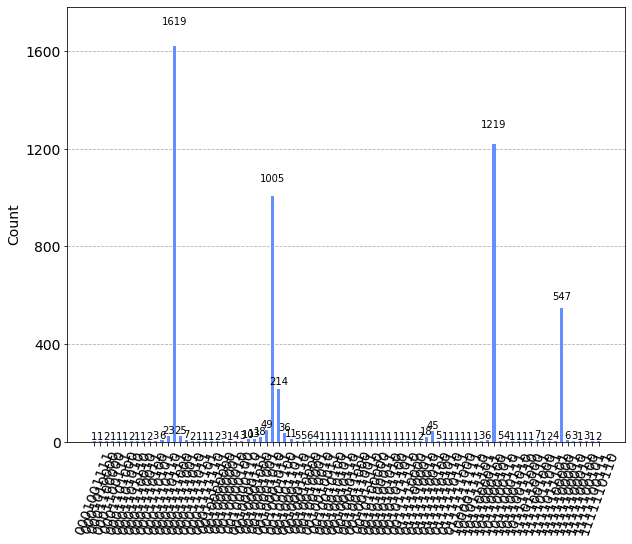

In [99]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000#2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer,figsize=(10,8))

In [100]:
print(answer)

{'0010010111': 1, '0011110000': 1, '0010101100': 1, '0111100001': 1, '0001111110': 1, '1111011101': 2, '1011111000': 1, '0001111111': 1, '1010111101': 1, '0001100111': 1, '1011001010': 1, '1011000111': 4, '0010101010': 1, '0001110010': 1, '1011000110': 5, '0001110011': 1, '0001111011': 2, '0111110010': 2, '0001110101': 3, '0010010011': 1, '0010000111': 10, '0010100011': 1, '1111100010': 6, '0010000100': 4, '0010001101': 36, '0010001010': 49, '0001101010': 1, '1111001000': 7, '1110110111': 1, '0001111010': 7, '0010001110': 11, '1011000101': 1219, '1111100011': 3, '0001111101': 1, '1011000011': 3, '0001111000': 1619, '0010001001': 18, '1011000100': 6, '0001001111': 1, '0001110111': 23, '1111100101': 3, '0010010101': 1, '0111111000': 1, '0010001000': 13, '0111110100': 45, '1111100001': 547, '0001101110': 2, '0111110011': 18, '0111110101': 5, '1111100111': 1, '0010001100': 214, '1000011110': 1, '0010000001': 3, '1111011011': 1, '0001010000': 1, '0001111001': 25, '0001110110': 6, '001000001

In [101]:
print(sorted(answer, key=answer.get, reverse=True)[0:8])

['0001111000', '1011000101', '0010001011', '1111100001', '0010001100', '0010001010', '0111110100', '0010001101']


In [103]:
print(int('0111110100',2))

500


In [105]:
myList = sorted(answer, key=answer.get, reverse=True)[0:8]
output_list = []
for element in myList:
    value = int(element,2)
    output_list.append(value)
print("The input list is:", myList)
print("The output list is:", sorted(output_list))

The input list is: ['0001111000', '1011000101', '0010001011', '1111100001', '0010001100', '0010001010', '0111110100', '0010001101']
The output list is: [120, 138, 139, 140, 141, 500, 709, 993]
